
=== Summary Statistics per Asset Class ===
                  mean     stdev  n_obs
PL_fixed_inc -0.026170  0.035573   22.0
PL_saham     -0.004867  0.089750   10.0
PL_RD         0.007727  0.045704   10.0

=== First rows with z-score / pdf / cdf columns ===
        Date  PL_fixed_inc  PL_saham  PL_RD  PL_fixed_inc_zscore  \
0 2024-01-31     -0.008903       NaN    NaN             0.485416   
1 2024-02-29     -0.008096       NaN    NaN             0.508090   
2 2024-03-31     -0.050960       NaN    NaN            -0.696888   
3 2024-04-30     -0.058610       NaN    NaN            -0.911931   
4 2024-05-31     -0.048073       NaN    NaN            -0.615711   

   PL_fixed_inc_pdf  PL_fixed_inc_cdf  PL_saham_zscore  PL_saham_pdf  \
0          9.968452          0.686309              NaN           NaN   
1          9.856801          0.694305              NaN           NaN   
2          8.797022          0.242937              NaN           NaN   
3          7.399631          0.180902         

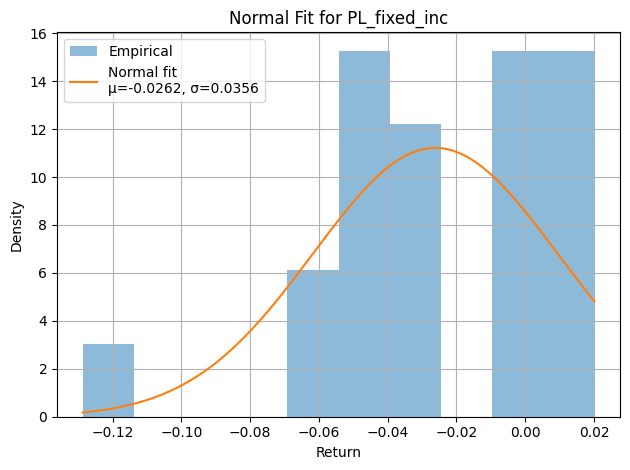

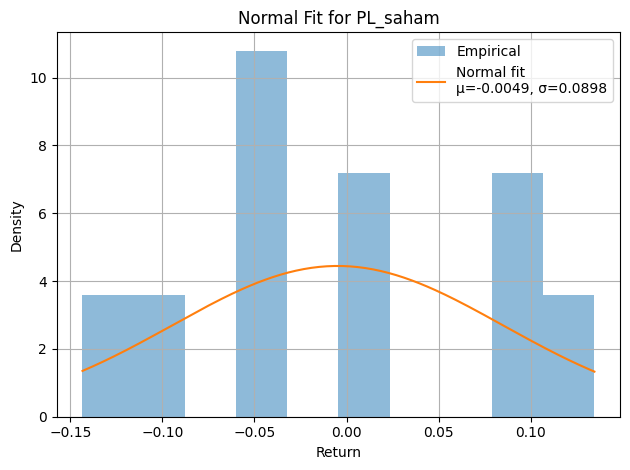

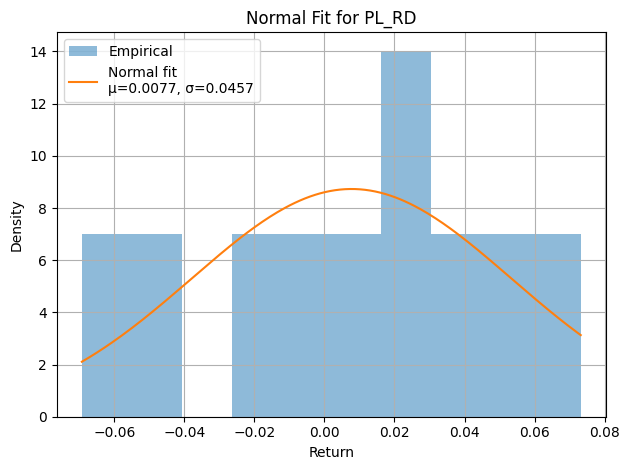

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# ---------------------------------------
# 1. LOAD DATA
# ---------------------------------------
df = pd.read_excel("potential_loss_gain.xlsx")

# Pastikan kolom Date terbaca datetime
df["Date"] = pd.to_datetime(df["Date"])

# Kolom return (semua selain Date)
return_cols = [col for col in df.columns if col != "Date"]

# ---------------------------------------
# 2. CLEAN DATA (pastikan float, biarkan NaN tetap NaN)
# ---------------------------------------
for col in return_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ---------------------------------------
# 3. COMPUTE MEAN, STDEV, Z-SCORE, PDF, CDF
# ---------------------------------------
results = {}

for col in return_cols:
    series = df[col].dropna()

    mu = series.mean()
    sigma = series.std(ddof=1)  # sample stdev (STDEV.S)

    results[col] = {
        "mean": mu,
        "stdev": sigma,
        "n_obs": len(series)
    }

    # Tambahkan kolom hasil ke df (akan berisi NaN kalau PL aslinya NaN)
    df[f"{col}_zscore"] = (df[col] - mu) / sigma
    df[f"{col}_pdf"] = norm.pdf(df[col], loc=mu, scale=sigma)
    df[f"{col}_cdf"] = norm.cdf(df[col], loc=mu, scale=sigma)

# ---------------------------------------
# 4. GENERATE SMOOTH NORMAL CURVE GRID & PLOT
# ---------------------------------------
def plot_normal_fit(col):
    series = df[col].dropna()
    mu = series.mean()
    sigma = series.std(ddof=1)

    x = np.linspace(series.min(), series.max(), 200)
    pdf = norm.pdf(x, mu, sigma)

    plt.figure()
    plt.hist(series, bins=10, density=True, alpha=0.5, label="Empirical")
    plt.plot(x, pdf, label=f"Normal fit\nμ={mu:.4f}, σ={sigma:.4f}")
    plt.title(f"Normal Fit for {col}")
    plt.xlabel("Return")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------------------------------------
# 5. PRINT RINGKASAN DI CONSOLE
# ---------------------------------------
stats_df = pd.DataFrame(results).T  # index = nama asset class
print("\n=== Summary Statistics per Asset Class ===")
print(stats_df)

print("\n=== First rows with z-score / pdf / cdf columns ===")
print(df.head())

# ---------------------------------------
# 6. (Opsional) PLOT SEMUA ASSET CLASS
# ---------------------------------------
for col in return_cols:
    plot_normal_fit(col)